In [3]:
import pandas as pd
import numpy as np

In [4]:
calendar = pd.read_csv('data/calendar.csv')
listing = pd.read_csv('data/listings.csv')

### Add neighbours to calendar

In [11]:
calendar = calendar.rename(columns = {"listing_id":"id"})

In [21]:
calendar = pd.merge(calendar, listing.loc[:,['id','neighbourhood']], on='id')


In [25]:
max(calendar.date)

'2024-03-27'

In [22]:
calendar.to_csv('calendar_with_neighbourhoods.csv')

### make testing set

In [51]:
sampled_calendar = calendar.sample(n=1000)

In [18]:
def clean_and_convert(string):
    # remove commas, dots, and dollar signs
    string = string.replace(',', '').replace('.', '').replace('$', '')

    # convert to float
    number = float(string)

    return number

In [53]:
sampled_calendar['price'] = sampled_calendar.price.apply(clean_and_convert)

In [56]:
grouped_calendar = sampled_calendar.groupby(['neighbourhood','date'])['price'].mean()

In [60]:
grouped_calendar.to_csv('group_calendar.csv')


In [65]:
gp = pd.read_csv('group_calendar.csv')


In [69]:
gp

,neighbourhood,date,price
0,Batignolles-Monceau,2023-04-10,32000.0
1,Batignolles-Monceau,2023-04-11,9950.0
2,Batignolles-Monceau,2023-04-15,8000.0
3,Batignolles-Monceau,2023-04-16,9700.0
4,Batignolles-Monceau,2023-04-19,10000.0
...,...,...,...
925,Élysée,2023-12-18,24000.0
926,Élysée,2024-01-01,142200.0
927,Élysée,2024-02-08,39400.0
928,Élysée,2024-02-26,15000.0


### get avg price per neighbourhood

In [74]:
listing.groupby('neighbourhood')['price'].mean().to_csv('neighbourhood_price.csv')

In [5]:
import pandas as pd
import folium

# Load the data into a Pandas DataFrame
data = pd.read_csv('data/neighbourhood_price.csv')

# Create a map centered on Paris
m = folium.Map(location=[48.8566, 2.3522], zoom_start=12)

# Add a choropleth layer to the map to show price by neighborhood
folium.Choropleth(
    geo_data='data/neighbourhoods.geojson',
    name='choropleth',
    data=data,
    columns=['neighbourhood', 'price'],
    key_on='feature.properties.neighbourhood',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Avg Price per night',
    tooltip = folium.GeoJsonTooltip(fields=['neighbourhood', 'price'], sticky=True, labels=True, toLocaleString=True)

).add_to(m)

# Add a layer control to the map
folium.LayerControl().add_to(m)

# Display the map
m


In [7]:
m.save('templates/map.html')

### Price over time evolution

In [126]:
data = pd.read_csv('data/calendar_with_neighbourhoods_test.csv')

In [127]:
data.head()

,Unnamed: 0,id,date,available,price,adjusted_price,minimum_nights,maximum_nights,neighbourhood
0,19950895,812084311501176503,2024-01-29,f,$150.00,$150.00,3.0,30.0,Passy
1,3681250,11502241,2023-10-22,f,$70.00,$70.00,4.0,9.0,Entrepôt
2,18609455,751514809211138373,2023-11-25,f,$275.00,$275.00,5.0,21.0,Panthéon
3,5825363,19078236,2024-01-26,f,$70.00,$70.00,365.0,1125.0,Buttes-Montmartre
4,10007390,35584267,2023-08-29,f,$35.00,$35.00,7.0,100.0,Opéra


In [163]:
def clean_and_convert(string):
    # remove commas and dollar signs
    string = string.replace(',', '').replace('$', '')

    # convert to float
    number = float(string)

    return number

In [129]:
data['price'] = data.price.apply(clean_and_convert)

In [130]:
data

,Unnamed: 0,id,date,available,price,adjusted_price,minimum_nights,maximum_nights,neighbourhood
0,19950895,812084311501176503,2024-01-29,f,150.0,$150.00,3.0,30.0,Passy
1,3681250,11502241,2023-10-22,f,70.0,$70.00,4.0,9.0,Entrepôt
2,18609455,751514809211138373,2023-11-25,f,275.0,$275.00,5.0,21.0,Panthéon
3,5825363,19078236,2024-01-26,f,70.0,$70.00,365.0,1125.0,Buttes-Montmartre
4,10007390,35584267,2023-08-29,f,35.0,$35.00,7.0,100.0,Opéra
...,...,...,...,...,...,...,...,...,...
995,16540392,649738923733042190,2023-03-30,f,345.0,$345.00,5.0,1125.0,Panthéon
996,16847684,664103061968004792,2024-02-20,t,288.0,$288.00,2.0,1125.0,Opéra
997,6085261,19654397,2024-02-12,f,495.0,$495.00,2.0,1125.0,Passy
998,3955017,12469271,2023-11-05,f,120.0,$120.00,365.0,1125.0,Gobelins


In [131]:
data['month'] = pd.DatetimeIndex(data['date']).month

In [132]:
test_neighbour_mean = data.groupby(['neighbourhood','month'])['price'].mean().unstack()

In [133]:
test_neighbour_mean = test_neighbour_mean.dropna(axis=0)

In [134]:
test_neighbour_mean

month,1,2,3,4,5,6,7,8,9,10,11,12
neighbourhood,,,,,,,,,,,,
Batignolles-Monceau,37.000000,79.500000,257.500000,115.125000,99.428571,130.000000,201.500000,228.200000,113.000000,107.000000,131.333333,85.250000
Bourse,355.600000,262.500000,301.000000,274.250000,65.000000,217.750000,122.500000,140.666667,239.000000,285.666667,184.000000,210.000000
Buttes-Chaumont,120.000000,80.833333,125.800000,135.400000,75.750000,86.000000,150.750000,120.000000,238.000000,90.750000,104.500000,129.500000
Buttes-Montmartre,105.000000,148.666667,94.375000,128.333333,96.666667,105.714286,118.583333,75.750000,218.750000,228.000000,148.583333,91.272727
Entrepôt,59.000000,82.625000,99.250000,128.000000,109.500000,110.000000,73.000000,103.000000,151.545455,130.250000,394.750000,255.500000
Louvre,163.333333,188.000000,184.500000,480.000000,170.000000,267.200000,300.000000,251.333333,375.000000,400.000000,411.000000,352.000000
Ménilmontant,119.750000,71.250000,124.666667,62.500000,100.000000,119.333333,68.285714,69.333333,90.800000,144.833333,120.200000,100.800000
Opéra,870.500000,167.000000,396.000000,206.600000,136.400000,282.400000,258.000000,392.000000,106.250000,137.250000,218.600000,157.000000
Palais-Bourbon,100.000000,668.750000,85.500000,290.000000,229.500000,1544.000000,456.000000,500.000000,255.000000,654.000000,85.000000,309.500000


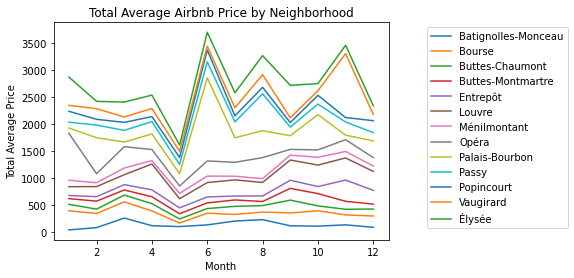

In [136]:
import numpy as np
import matplotlib.pyplot as plt

neighborhoods = test_neighbour_mean.T.columns
months = test_neighbour_mean.columns
num_neighborhoods = len(neighborhoods)
num_months = len(months)
prices = np.array(test_neighbour_mean.T)

# Create the figure and axis
fig, ax = plt.subplots()

# Plot the stacked lines
for i in range(num_neighborhoods):
    if i == 0:
        ax.plot(months, prices[:, i], label=neighborhoods[i])
    else:
        ax.plot(months, np.sum(prices[:, :i+1], axis=1), label=neighborhoods[i])

# Customize the plot
ax.set_xlabel('Month')
ax.set_ylabel('Total Average Price')
ax.set_title('Total Average Airbnb Price by Neighborhood')
ax.legend(loc='upper right', bbox_to_anchor=(1.55, 1))

# Display the plot
plt.show()


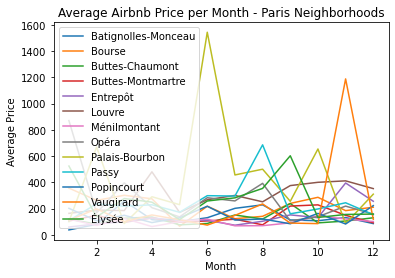

In [138]:
import pandas as pd
import matplotlib.pyplot as plt


# Create the line plot
fig, ax = plt.subplots()

# Plot each neighborhood's average price per month
for neighborhood in test_neighbour_mean.T.columns:
    ax.plot(test_neighbour_mean.T.index, test_neighbour_mean.T[neighborhood], label=neighborhood)

# Customize the plot
ax.set_xlabel('Month')
ax.set_ylabel('Average Price')
ax.set_title('Average Airbnb Price per Month - Paris Neighborhoods')
ax.legend()

# Display the plot
plt.show()


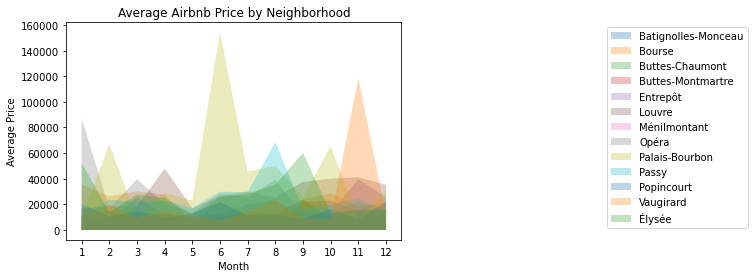

In [104]:
import numpy as np
import matplotlib.pyplot as plt

# # Generate sample data
# months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# neighborhoods = ['Neighborhood A', 'Neighborhood B', 'Neighborhood C', 'Neighborhood D',
#                  'Neighborhood E', 'Neighborhood F', 'Neighborhood G', 'Neighborhood H',
#                  'Neighborhood I', 'Neighborhood J', 'Neighborhood K', 'Neighborhood L']
# num_months = len(months)
# num_neighborhoods = len(neighborhoods)

neighborhoods = test_neighbour_mean.T.columns
months = test_neighbour_mean.columns
num_neighborhoods = len(neighborhoods)
num_months = len(months)
prices = np.array(test_neighbour_mean.T)

# # Generate random average prices for each month and neighborhood
# np.random.seed(42)
# prices = np.random.randint(50, 150, size=(num_months, num_neighborhoods))

# Create the figure and axis
fig, ax = plt.subplots()

# Plot the time series area chart
for i in range(num_neighborhoods):
    ax.fill_between(range(num_months), prices[:, i], alpha=0.3, label=neighborhoods[i])

# Customize the plot
ax.set_xticks(range(num_months))
ax.set_xticklabels(months)
ax.set_xlabel('Month')
ax.set_ylabel('Average Price')
ax.set_title('Average Airbnb Price by Neighborhood')

# Add legend
ax.legend(loc='upper right',bbox_to_anchor=(2.05, 1))

# Display the plot
plt.show()


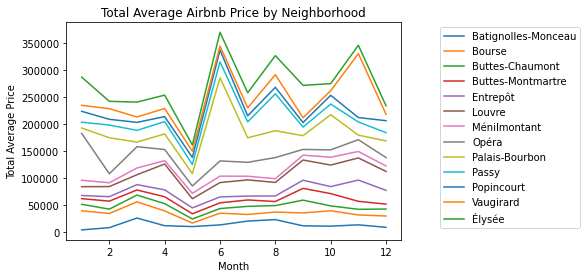

In [ ]:
# pd.read_csv('data/calendar_with_neighbourhoods.csv')

In [106]:
# import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation
# import numpy as np

# # Generate random data for demonstration
# neighborhoods = ['Neighborhood A', 'Neighborhood B', 'Neighborhood C']
# time_periods = ['Jan', 'Feb', 'Mar', 'Apr', 'May']
# num_neighborhoods = len(neighborhoods)
# num_time_periods = len(time_periods)
# data = np.random.randint(50, 150, size=(num_neighborhoods, num_time_periods))

# # Set up the figure and axes
# fig, ax = plt.subplots()
# ax.set_title('Price Evolution by Neighborhood')
# ax.set_xlabel('Time')
# ax.set_ylabel('Price')
# ax.set_ylim(0, 200)

# # Define the animation update function
# def update(frame):
#     ax.clear()
#     ax.set_title('Price Evolution by Neighborhood')
#     ax.set_xlabel('Time')
#     ax.set_ylabel('Price')
#     ax.set_ylim(0, 200)
    
#     # Update the plot for the current frame
#     for i in range(num_neighborhoods):
#         if data[i, :frame+1] != np.nan:
#             ax.plot(time_periods[:frame+1], data[i, :frame+1], marker='o', linestyle='-', label=neighborhoods[i])
#     ax.legend()

# # Create the animation
# animation = FuncAnimation(fig, update, frames=num_time_periods, interval=1000, repeat=False)

# # # Save the animation as a GIF file
# # animation.save('price_evolution_animation.gif', writer='pillow')

# # # Show the animated plot
# # plt.show()

# from IPython.display import HTML

# animation_html = animation.to_jshtml()
# HTML(animation_html)

### number of properties per neighbourhood

In [158]:
ext_listings = pd.read_csv('data/listings_ext.csv')

In [164]:
ext_listings['price'] = ext_listings.price.apply(clean_and_convert)

In [159]:
counts = ext_listings.groupby('neighbourhood_cleansed').count()['id']

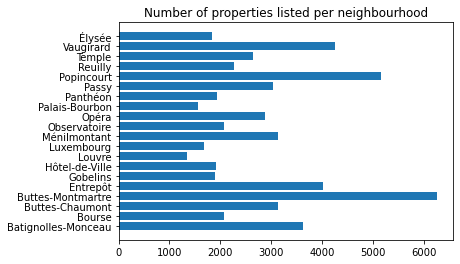

In [160]:
plt.title('Number of properties listed per neighbourhood')
plt.barh(counts.index, counts.values)
plt.savefig('static/numberListed.png', bbox_inches='tight')
plt.show()

In [168]:
accom_neighs = ext_listings.groupby(['neighbourhood_cleansed','accommodates'])['price'].mean().unstack()

In [169]:
accom_neighs

accommodates,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
neighbourhood_cleansed,,,,,,,,,,,,,,,,,
Batignolles-Monceau,0.0,70.141361,120.758565,117.230284,187.380571,259.596639,267.200000,458.950000,382.463415,1028.500000,479.200000,NaN,999.600000,NaN,1206.000000,NaN,NaN
Bourse,NaN,162.467742,140.998894,187.681529,241.388994,308.857143,347.214286,369.200000,487.025641,398.875000,487.700000,307.000000,383.583333,331.666667,634.285714,509.857143,369.750000
Buttes-Chaumont,NaN,75.221591,107.013479,134.000000,127.985469,132.822581,317.478788,206.045455,289.305556,310.333333,440.000000,NaN,371.000000,400.000000,885.000000,800.000000,842.500000
Buttes-Montmartre,0.0,69.732759,102.186388,113.239714,141.023907,203.392473,201.370192,261.458333,607.483871,356.000000,397.500000,NaN,1151.000000,NaN,600.000000,875.000000,NaN
Entrepôt,0.0,71.137566,108.090864,126.684814,170.891949,216.102564,278.021008,424.218750,368.415094,418.000000,542.727273,633.000000,428.000000,352.500000,791.000000,432.000000,735.666667
Gobelins,NaN,62.020690,85.864155,103.936416,155.119914,172.117647,206.108911,416.538462,250.739130,295.000000,286.600000,NaN,700.000000,NaN,96.000000,NaN,1600.000000
Hôtel-de-Ville,NaN,94.777778,148.899554,178.201058,266.116142,352.407407,400.184397,367.714286,875.571429,574.000000,600.857143,NaN,736.000000,NaN,NaN,NaN,457.000000
Louvre,0.0,109.146341,178.151815,203.752212,281.410667,434.487805,447.603175,378.888889,532.142857,192.000000,798.666667,NaN,904.333333,NaN,NaN,NaN,NaN
Luxembourg,NaN,100.723214,182.313869,242.846667,280.958974,372.409091,513.444444,670.750000,751.676471,NaN,2576.400000,392.800000,1399.333333,NaN,NaN,369.000000,299.428571


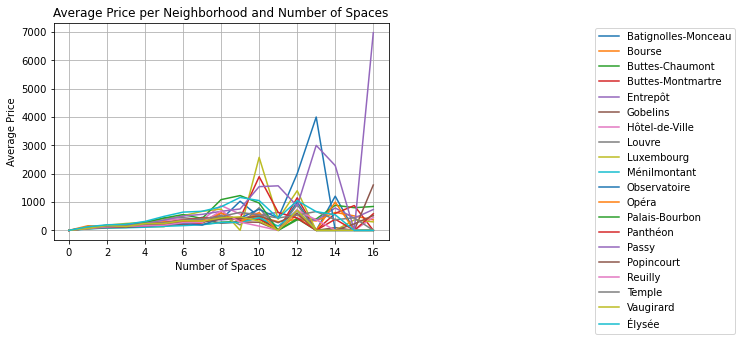

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Extract the relevant columns
neighborhoods = accom_neighs.T.columns.values
spaces = accom_neighs.columns.values
avg_prices = np.array(accom_neighs)

# Create the line plot
fig, ax = plt.subplots()

# Plot the lines for each neighborhood
for i, neighborhood in enumerate(neighborhoods):
    ax.plot(spaces, avg_prices[i, :], label=neighborhood)

# Customize the plot
ax.set_xlabel('Number of Spaces')
ax.set_ylabel('Average Price')
ax.set_title('Average Price per Neighborhood and Number of Spaces')
ax.legend(bbox_to_anchor=(2.05, 1))
ax.grid(True)

# Display the plot
plt.show()


In [174]:
accom_neighs = accom_neighs.fillna(0)

ValueError: s must be a scalar, or float array-like with the same size as x and y

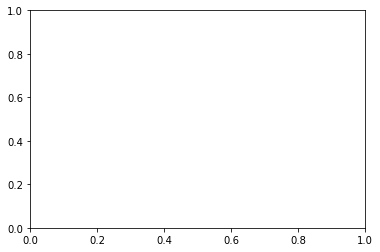

In [182]:
import pandas as pd
import matplotlib.pyplot as plt


# Extract the relevant columns
neighborhoods = accom_neighs.T.columns.values
spaces = accom_neighs.columns.values
avg_prices = np.array(accom_neighs)

# Create the bubble chart
fig, ax = plt.subplots()

# Set the bubble size based on the average price
bubble_size = avg_prices * 10

# Create meshgrid for x and y coordinates
X, Y = np.meshgrid(spaces, avg_prices)

# Flatten the meshgrid arrays
X = X.flatten()
Y = Y.flatten()
bubble_size = bubble_size.flatten()

# Plot the bubbles
ax.scatter(X, Y, s=bubble_size, alpha=0.5)

# Customize the plot
ax.set_xlabel('Number of Spaces')
ax.set_ylabel('Average Price')
ax.set_title('Average Price per Neighborhood and Number of Spaces')
ax.grid(True)

# Display the plot
plt.show()


ValueError: x and y must be the same size

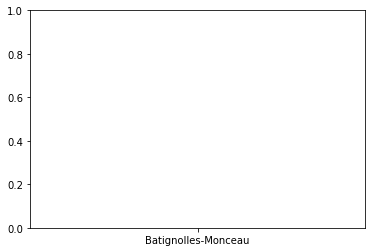

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Extract the relevant columns
neighborhoods = accom_neighs.columns.values
spaces = accom_neighs.index.values
avg_prices = np.array(accom_neighs)

# Create the bubble chart
fig, ax = plt.subplots()

# Set the bubble size based on the average price
bubble_size = avg_prices.flatten() * 10

# Plot the bubbles
ax.scatter(spaces, avg_prices.flatten(), s=bubble_size, alpha=0.5)

# Customize the plot
ax.set_xlabel('Number of Spaces')
ax.set_ylabel('Average Price')
ax.set_title('Average Price per Neighborhood and Number of Spaces')
ax.grid(True)

# Display the plot
plt.show()
